<a href="https://colab.research.google.com/github/sarasantosds/correlacao_pearson_spearman/blob/main/correlacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlação
É uma medida que indica como duas variáveis se relacionam. Ou seja, se uma aumenta, a outra tende a aumentar ou diminuir, ou se não há padrão. Não indica causalidade, apenas associação.

## Coeficiente de Correlação de Pearson

É uma medida que avalia a força e a direção da relação linear entre duas variáveis numéricas. Vai de -1 a 1:

**1** é **perfeita correlação positiva** (ambas crescem juntas)

**-1** é **perfeita correlação negativa** (uma cresce enquanto a outra cai)

**0** é  **nenhuma correlação linear**



**Dados fictícios referente a quantidade de horas estudadas e as notas nas provas**

In [2]:
horas_x = [2,3,4,5,6]
notas_y = [65,70,75,80,85]

**Fórmula da média aritmética em Python Puro**

In [3]:
def media(dados):
  soma = 0
  media = 0
  for x in dados:
    soma += x
  media = soma/len(dados)
  return media

**Fórmula dos desvios em Python Puro**

In [4]:
def desvios(dados,media):
  desvios = []
  dif = 0
  for x in dados:
    dif = (x - media)
    desvios.append(dif)
  return desvios

**Fórmula da covariância em Python Puro**

In [5]:
def covariancia(desvios_x, desvios_y, tamanho):
  soma = 0
  cov = 0
  for x, i in zip(desvios_x, desvios_y):
    soma += (x * i)
  cov = soma / (tamanho - 1)
  return cov

**Fórmula do desvio padrão em Python Puro**

In [6]:
import numpy as np
def desvio_padrao(dados, media):
  soma = 0
  variancia = 0
  desvpad = 0
  for x in dados:
    soma += ((x - media) ** 2)
  variancia = soma / (len(dados) - 1)
  desvpad = np.sqrt(variancia)
  return desvpad

**Fórmula do coeficiente de correlação de Pearson em Python Puro**

$$r = \frac{\text{cov}(X, Y)}{s_X \times s_Y}$$

In [7]:
def pearson(cov, desvpad_x, desvpad_y):
  pearson = cov / (desvpad_x * desvpad_y)
  return pearson

### Resultados obtidos utilizando as funções desenvolvidas por mim

In [8]:
media_x, media_y = media(horas_x), media(notas_y)
media_x, media_y

(4.0, 75.0)

In [9]:
desvios_x, desvios_y = desvios(horas_x,media_x), desvios(notas_y, media_y)
desvios_x, desvios_y

([-2.0, -1.0, 0.0, 1.0, 2.0], [-10.0, -5.0, 0.0, 5.0, 10.0])

In [10]:
tamanho = len(horas_x)
cov = covariancia(desvios_x, desvios_y, tamanho)
cov

12.5

In [11]:
desvpad_x, desvpad_y = desvio_padrao(horas_x, media_x), desvio_padrao(notas_y, media_y)
round(desvpad_x,3), round(desvpad_y,3)

(np.float64(1.581), np.float64(7.906))

In [12]:
pearson = pearson(cov,desvpad_x, desvpad_y)
pearson

np.float64(1.0)

# Gráfico de Correlação de Pearson

O gráfico demonstra uma correlação positiva muito forte, quase perfeita.

**Relação Positiva:** É visível que o aumento nas "Horas de estudo" está diretamente associado a um aumento nas "Notas na prova". A linha geral dos pontos é ascendente.

**Força Elevada:** Os pontos estão quase perfeitamente alinhados em uma linha reta. Isso sugere que o tempo de estudo é um excelente preditor da nota.

**Conclusão:** Há uma associação linear e muito consistente: quem estuda mais, tira notas mais altas. Se fôssemos calcular o Coeficiente de Correlação (seja Spearman ou Pearson), ele estaria muito próximo de $+1.0$.

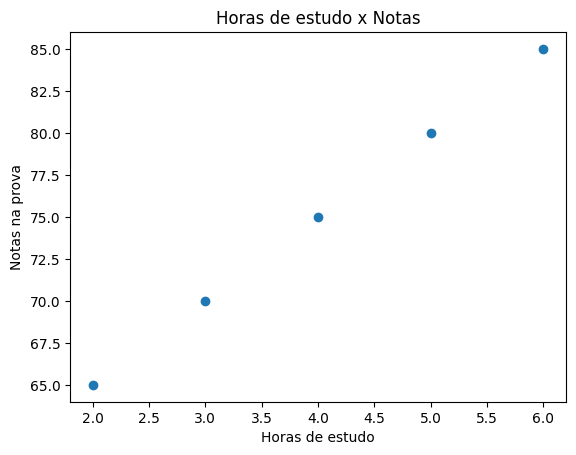

In [13]:
import matplotlib.pyplot as plt

plt.scatter(horas_x, notas_y)
plt.title("Horas de estudo x Notas")
plt.xlabel("Horas de estudo")
plt.ylabel("Notas na prova")
plt.show()

## Coeficiente de Correlação de Spearman

É uma medida que avalia a força e a direção da relação monotônica (não precisa ser linear) entre duas variáveis, usando postos (rankings) em vez de valores diretos. Também vai de -1 a 1, mas é mais robusto para relações não lineares ou quando há valores extremos (outliers).

**Cada conjunto x e y possui um item e um rankeamento (posto)**

In [55]:
x = [(1,1), (2,2), (3,3), (4,4), (5,5)]
y = [(2,2), (1,1), (4,4), (5,5), (3,3)]

**Criando um conjunto com os rankeamentos (postos) de cada item de x**

In [84]:
rank_x = []
for _,i, in x:
  rank_x.append(i)
rank_x

[1, 2, 3, 4, 5]

**Criando um conjunto com os rankeamentos (postos) de cada item de y**

In [57]:
rank_y = []
for _,j, in y:
  rank_y.append(j)
rank_y

[2, 1, 4, 5, 3]

**Calculando a diferença entre os postos de x e postos de y**

In [90]:
dif = []
diferenca = 0
for i, j in zip(rank_x, rank_y):
  diferenca = i - j
  dif.append(diferenca)
dif

[-1, 1, -1, -1, 2]

**Realizando a soma dos quadrados da diferença dos postos de x e y**

In [94]:
soma = 0
for d in dif:
  soma += (d ** 2)
soma

8

**Calculando o coeficiente de Spearman**
$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

In [96]:
tamanho = len(x)
spearman = 0
spearman = 1- (6 * soma )/ (tamanho * (tamanho ** 2 -1))
spearman

0.6

## Gráfico de Correlação de Spearman

O gráfico e o Coeficiente de Spearman ($\rho = 0.6$) indicam uma correlação positiva de moderada a forte.

**Relação Positiva:** O valor positivo ($0.6$) significa que existe uma tendência  clara: quando o Rank de X aumenta, o Rank de Y também aumenta.

**Força Moderada a Forte:** O valor está longe de zero, mostrando que a associação é significativa. Os pontos estão dispersos (não formam uma linha reta perfeita), o que impede que o coeficiente seja 1.0 (perfeita), mas a relação ainda é forte.

**Conclusão:** Há um bom acompanhamento monotônico entre as duas variáveis; elas geralmente se movem na mesma direção.

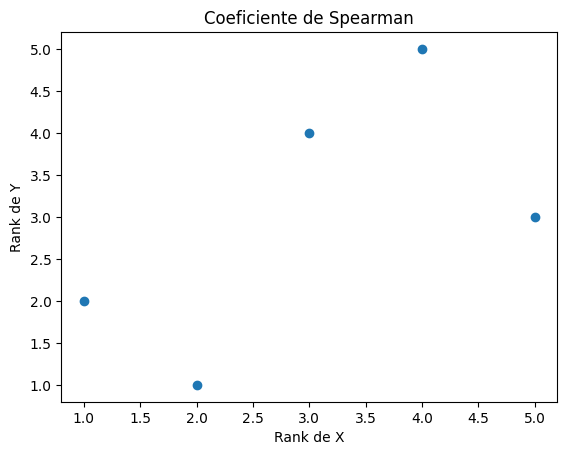

In [83]:
plt.scatter(rank_x, rank_y)
plt.title("Coeficiente de Spearman")
plt.xlabel("Rank de X")
plt.ylabel("Rank de Y")
plt.show()